# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
\nabla_w Q(x) = -2(y - Xw)^T X
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [7]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [8]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/124512329/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/124512412/


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/124512488/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/124512584/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/124513396/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [9]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [10]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [11]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

Text(0, 0.5, 'Плотность')

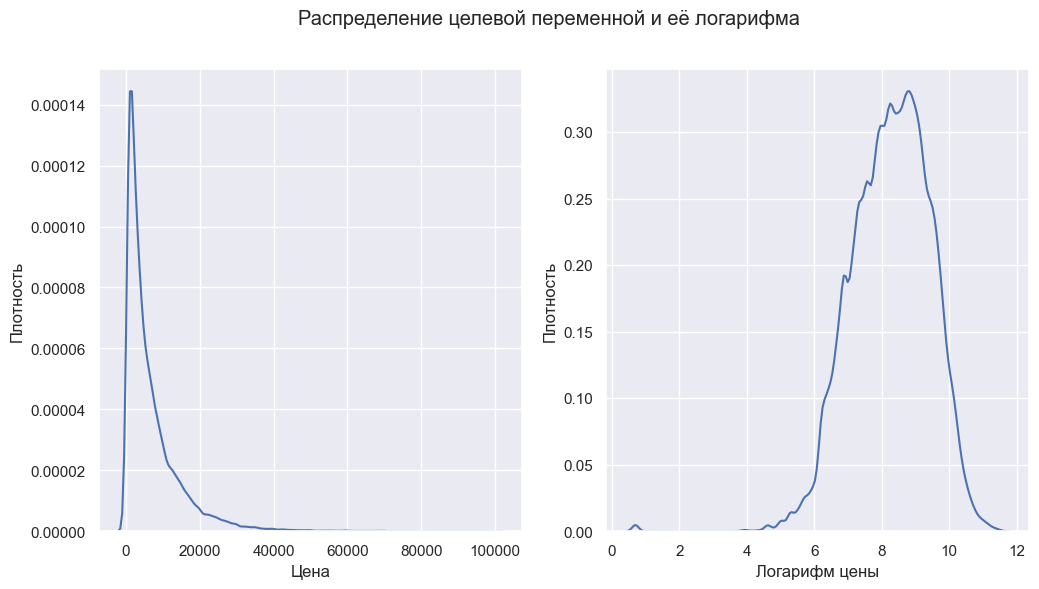

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle("Распределение целевой переменной и её логарифма")

sns.kdeplot(data["price"], ax=axes[0])
sns.kdeplot(np.log1p(data["price"]), ax=axes[1])

axes[0].set_xlabel("Цена")
axes[1].set_xlabel("Логарифм цены")

axes[0].set_ylabel("Плотность")
axes[1].set_ylabel("Плотность")

In [13]:
max(data["price"])

99999

Распределение логарифмированной цены симметрично, тогда как распределение цены в исходном виде - очень силно скошено. Будем предсказывать логарифм цены. \
Также по графикам сразу видны выбросы: наблюдения, у которых логарифм таргета меньше ~4.
При этом выбросов сверху нет. В принципе максимальная цена по всему даатсету составляет ~100 тыс. евро - автомобиль легко может стоить столько.

In [14]:
df = data
df["logprice"] = np.log1p(df["price"])
df = df.drop(columns=["price"])

df = df[df["logprice"] > np.quantile(df["logprice"], 0.0015)]

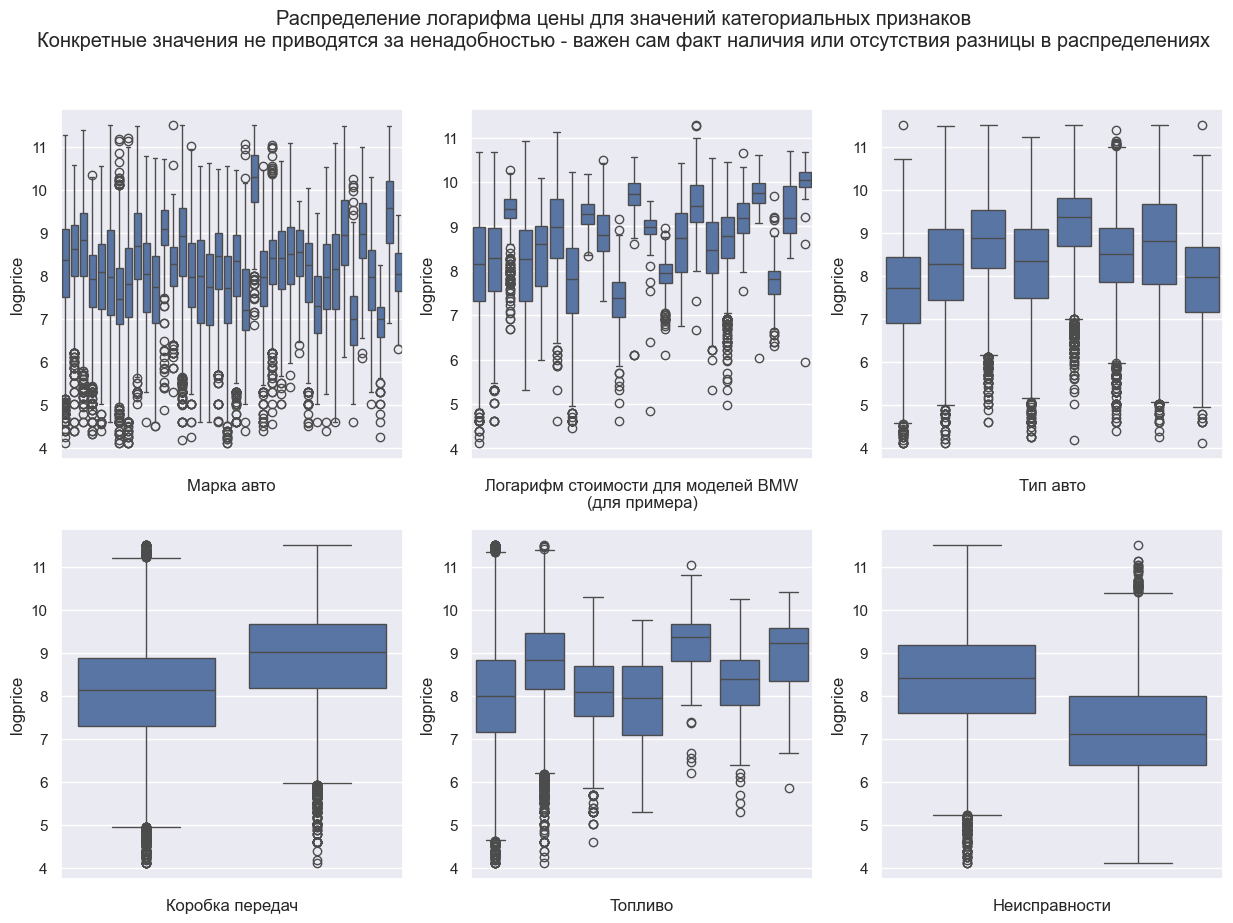

In [15]:
# 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

fig.suptitle("Распределение логарифма цены для значений категориальных признаков\n" + 
            "Конкретные значения не приводятся за ненадобностью - важен сам факт наличия или отсутствия разницы в распределениях")

sns.boxplot(x=df["brand"], y=df["logprice"], ax=axes[0][0])
axes[0][0].set_xlabel("Марка авто")

sns.boxplot(x=df[df["brand"] == "volkswagen"]["model"], y=df[df["brand"] == "volkswagen"]["logprice"], ax=axes[0][1])
axes[0][1].set_xlabel("Логарифм стоимости для моделей BMW\n(для примера)")

sns.boxplot(x=df["vehicleType"], y=df["logprice"], ax=axes[0][2])
axes[0][2].set_xlabel("Тип авто")

sns.boxplot(x=df["gearbox"], y=df["logprice"], ax=axes[1][0])
axes[1][0].set_xlabel("Коробка передач")

sns.boxplot(x=df["fuelType"], y=df["logprice"], ax=axes[1][1])
axes[1][1].set_xlabel("Топливо")

sns.boxplot(x=df["notRepairedDamage"], y=df["logprice"], ax=axes[1][2])
axes[1][2].set_xlabel("Неисправности")

for row in range(2):
    for col in range(3):
        axes[row][col].set_xticklabels([])

plt.show()

In [16]:
model_brand = df.groupby(["model"])["brand"].apply(lambda x: x.unique().tolist())
model_brand[model_brand.apply(lambda l: len(l)) > 1]

model
1_reihe                                        [peugeot, mazda]
3_reihe                                        [mazda, peugeot]
5_reihe                                        [mazda, peugeot]
andere        [mercedes_benz, volkswagen, bmw, mitsubishi, h...
defender                                    [land_rover, rover]
discovery                                   [land_rover, rover]
freelander                                  [land_rover, rover]
grand                                  [suzuki, jeep, chrysler]
matiz                                       [chevrolet, daewoo]
Name: brand, dtype: object

**Комментарий**: Как мы видим, все категориальыне признаки содержат информацию о логарифме цены. Также можно подумать о том, чтобы избавиться от признака "brand" - ведь у нас в любом случае есть более точная информация о конкретной модели внутри бренда. Но, как мы видим, у разных брендов существуют одноимённые модели (не говоря уже о категории "andere", то есть "другое"). Кажется, разумно будет сделать один категориальный признак вида `brand:model` - мы не будем дублирвоать информацию, при этом решим проблему одноимённых моделей. \
Напишем для этого трансформер. В нём же перекодируем значения бинарных признаков в 0 и 1.

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin

class model_brand_transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        res = X.drop(columns=["brand", "model"])
        res["brand:model"] = X["brand"].astype(str) + ":" + X["model"].astype(str)

        res["gearbox"] = np.where(res["gearbox"] == "automatik", 1, 0)
        res["notRepairedDamage"] = np.where(res["notRepairedDamage"] == "ja", 1, 0)
        
        return res

model_brand_transformer().transform(df)

,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,logprice,bias,brand:model
0,kleinwagen,0,benzin,0,75,150000,177,7.313887,1,volkswagen:golf
1,kleinwagen,0,diesel,0,69,90000,93,8.188967,1,skoda:fabia
2,limousine,0,benzin,1,102,150000,246,6.478510,1,bmw:3er
3,cabrio,0,benzin,0,109,150000,140,7.696667,1,peugeot:2_reihe
4,limousine,0,benzin,0,105,150000,136,7.601402,1,mazda:3_reihe
...,...,...,...,...,...,...,...,...,...,...
241185,limousine,0,diesel,0,140,150000,69,8.974745,1,volkswagen:golf
241186,limousine,0,benzin,1,225,150000,142,8.071219,1,seat:leon
241187,cabrio,1,benzin,0,101,125000,192,7.090077,1,smart:fortwo
241188,bus,0,diesel,0,102,150000,241,9.127067,1,volkswagen:transporter


<Axes: xlabel='autoAgeMonths', ylabel='logprice'>

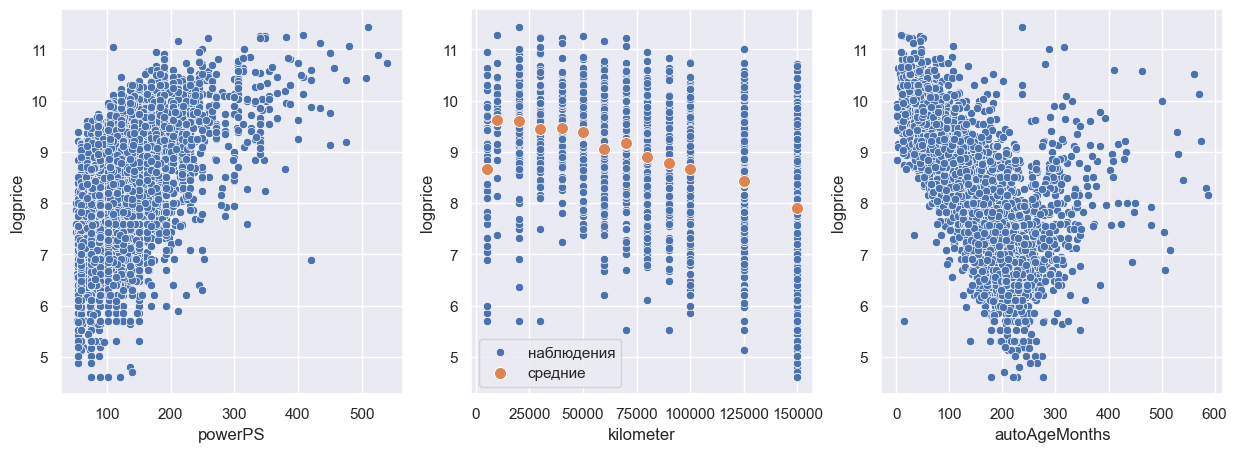

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# рассмотрим случайню подвыборку - иначе диаграммы рассеивания полностью забиты наблюдениями
sample = df.sample(5000)

sns.scatterplot(x=sample["powerPS"], y=sample["logprice"], ax=axes[0])

sns.scatterplot(x=sample["kilometer"], y=sample["logprice"], ax=axes[1], label="наблюдения")
mean_by_kilometer = sample.groupby("kilometer")["logprice"].mean().reset_index()
sns.scatterplot(x=mean_by_kilometer["kilometer"], y=mean_by_kilometer["logprice"], s=75, ax=axes[1], label="средние")

sns.scatterplot(x=sample["autoAgeMonths"], y=sample["logprice"], ax=axes[2])

In [19]:
min(sample["kilometer"])

5000

**Комментарий:** Здесь мы видим, что `powerPS` и `autoAgeMonths` - хорошие численные признаки, имеющие непрерывную шкалу и более или менее линейно (или хотя бы монотонно) влияющие на целевую переменную. \
А вот признак, отвечающий за пробег, то есть `kilometr` - интересный. Используется дискретная шкала, при этом если бы не выбивающееся значение 5000, можно было бы закодировать его как порядковый: для остальных значений имеет место убывание `logprice` в зависимости от `kilometer`. Чтобы не изобретать лишней логики, сделаем признак категориальным. В конце концов, у нас не так много уникальных значений.

In [20]:
categorical = ["brand:model", "vehicleType", "fuelType", "kilometer"]
numeric = ["powerPS", "autoAgeMonths"]
other = ["gearbox", "notRepairedDamage"]

In [21]:
df['bias'] = 1
other += ['bias']

x = model_brand_transformer().transform(df.drop(columns=['logprice']))
y = df['logprice']

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [24]:
def r_squared(y_true, y_pred):
    RSS = np.sum((y_true - y_pred)**2)
    TSS = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (RSS / TSS)

In [78]:
lambda_values = np.logspace(-5, 0, 15)

descent_config = {
    "descent_name": None,
    "kwargs": {
        "dimension": x_train.shape[1],
        "lambda_": None
    }
}

descent_methods = ["full", "stochastic", "momentum", "adam"]

best_fits = {}

for method in descent_methods:
    fits = []
    for lambda_ in lambda_values:
        descent_config["descent_name"] = method
        descent_config["kwargs"]["lambda_"] = lambda_
        
        reg = LinearRegression(descent_config=descent_config)
        reg.fit(x_train, y_train.to_numpy())

        loss = reg.calc_loss(x_val, y_val)
        if loss != loss:
            continue
        
        fits.append({
            "lambda": lambda_,
            "val_loss": reg.calc_loss(x_val, y_val),
            "loss_history": reg.loss_history,
            "r_squared": r_squared(y_val, reg.predict(x_val))
        })
        
    best_fit = min(fits, key=lambda fit: fit["val_loss"])
    best_fits[method] = best_fit

C:\Users\vadim\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\ВШЭ\ml-hse\ML1\homework-practice-03-gd\descents.py:84: RuntimeWarning: overflow encountered in power
  return np.power(self.predict(x) - y, 2).mean()
C:\Users\vadim\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\ВШЭ\ml-hse\ML1\homework-practice-03-gd\linear_regression.py:53: RuntimeWarning: overflow encountered in multiply
  def predict(self, x: np.ndarray) -> np.ndarray:


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

full: loss = 0.397, R^2 = 0.683
stochastic: loss = 0.565, R^2 = 0.549
momentum: loss = 0.287, R^2 = 0.771
adam: loss = 0.263, R^2 = 0.790


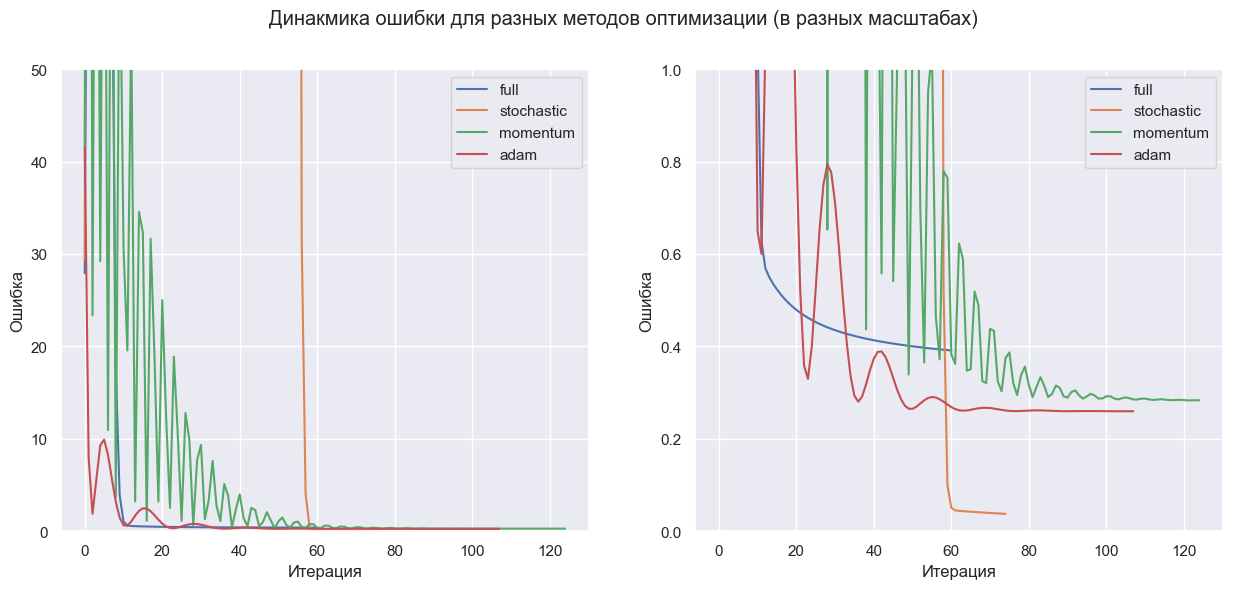

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for model, fit in best_fits.items():
    sns.lineplot(best_fits[model]["loss_history"], label=model, ax=axes[0])
    sns.lineplot(best_fits[model]["loss_history"], label=model, ax=axes[1])
    print(f"{model}: loss = {fit["val_loss"]:.3f}, R^2 = {fit["r_squared"]:.3f}")

axes[0].set_ylim(0, 50)
axes[1].set_ylim(0, 1)

axes[0].set_xlabel("Итерация")
axes[0].set_ylabel("Ошибка")
axes[1].set_xlabel("Итерация")
axes[1].set_ylabel("Ошибка")

plt.suptitle("Динакмика ошибки для разных методов оптимизации (в разных масштабах)")

plt.show()

Как мы видим, самый плохой результат показывает стохастический градиентный спуск, а самый хороший - adam.
1) Ванильный градиентный спуск сходится гладко, что неудивительно - длина шага подчинена понятной убывающей функции и мы всегде идём строго по антиградиенту. Однако метод, видимо, застревает в каком-то локальном минимуме и даёт довольно плохие показатели.
2) Стохастический градиентный спуск также спускается гладко, и даже показывает лучший результат на обучающей выборке. Однако на валидационной оказывается худшимю
3) Momentum даёт график, похожий на пилу. При этом со временем колебания затухают и инерция, видимо, позволяет "перепрыгнуть" локальные минимумы, в котоыре падал обычный градиентный спуск, поэтому несмотря на изначальные сильные колебания результат - лучше.
4) Adam показывает поведение, похожее на Momentum, но даёт большую точность. Особенно выигрывает он на поздних итерациях, когда рельеф функции потерь становится сложным, и адаптивная длина шага позволяет добиться самой высокой точности.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [51]:
import time

batch_sizes = np.arange(5, 500, 10)
k = 30

descent_config = {
    "descent_name": "stochastic",
    "kwargs": {
        "dimension": x_train.shape[1],
        "lambda_": best_fits["stochastic"]["lambda"],
        "batch_size": None
    }
}

descents = {}
times = {}

for batch_size in batch_sizes:
    for _ in range(k):
        descent_config["kwargs"]["batch_size"] = batch_size

        reg = LinearRegression(descent_config)
        start_time = time.time()
        reg.fit(x_train, y_train.to_numpy())
        end_time = time.time()

        descents[batch_size] = descents.get(batch_size, []) + [len(reg.loss_history)]
        times[batch_size] = times.get(batch_size, []) + [end_time - start_time]

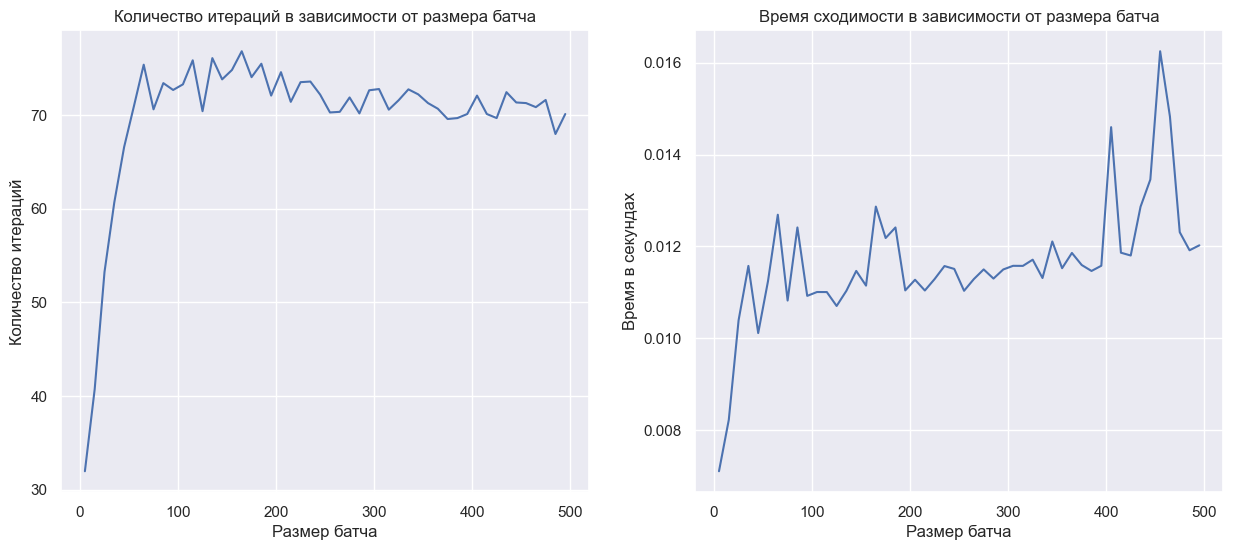

In [52]:
for lambda_, iters in descents.items():
    lambda_, np.array(iters).mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.lineplot(
    x=[lambda_ for lambda_, _ in descents.items()],
    y=[np.array(iters).mean() for _, iters in descents.items()],
    ax=axes[0]
)
axes[0].set_title("Количество итераций в зависимости от размера батча")
axes[0].set_xlabel("Размер батча")
axes[0].set_ylabel("Количество итераций")

sns.lineplot(
    x=[lambda_ for lambda_, _ in times.items()],
    y=[np.array(time).mean() for _, time in times.items()],
    ax=axes[1]
)
axes[1].set_title("Время сходимости в зависимости от размера батча")
axes[1].set_xlabel("Размер батча")
axes[1].set_ylabel("Время в секундах")

plt.show()

Количество итераций до сходимости в зависимости от размера батче в среднем, как кажется, убывает (если не считать странную область очень быстрой сходимости при маленьких батчах - видимо, там оценка градиента батчем получается совсем плохой и сходимость обеспечена не точностью, а хаотичным поведением). Эта тенденция имеет смысл - больший батч даёт более точную оценку градиента, а значит, более прямым путём ведёт к минимуму. \
При этом время работы градиентного спуска растёт с размером батча - видимо, уменьшение количества итераций от роста батча не такое быстрое, как рост сложности рассчётов.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/124616841/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [62]:
lambda_values = np.logspace(0.5, -5, 10)
mu_values = np.logspace(-2, 2, 5)

descent_methods = ["full", "stochastic", "momentum", "adam"]

descent_config = {
    "descent_name": None,
    "regularized": True,
    "kwargs": {
        "dimension": x_train.shape[1],
        "lambda_": None,
        "mu": None
    }
}

best_reg_fits = {}

for method in descent_methods:
    fits = []
    for lambda_ in lambda_values:
        for mu in mu_values:
            descent_config["descent_name"] = method
            descent_config["kwargs"]["lambda_"] = lambda_
            descent_config["kwargs"]["mu"] = mu
            
            reg = LinearRegression(descent_config=descent_config)
            reg.fit(x_train, y_train.to_numpy())
    
            loss = reg.calc_loss(x_val, y_val)
            if loss != loss:
                continue
            
            fits.append({
                "lambda": lambda_,
                "mu": mu,
                "val_loss": reg.calc_loss(x_val, y_val),
                "loss_history": reg.loss_history,
                "r_squared": r_squared(y_val, reg.predict(x_val))
            })
        
    best_fit = min(fits, key=lambda fit: fit["val_loss"])
    best_reg_fits[method] = best_fit

C:\Users\vadim\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
D:\ВШЭ\ml-hse\ML1\homework-practice-03-gd\descents.py:84: RuntimeWarning: overflow encountered in power
  return np.power(self.predict(x) - y, 2).mean()
D:\ВШЭ\ml-hse\ML1\homework-practice-03-gd\linear_regression.py:53: RuntimeWarning: overflow encountered in multiply
  def predict(self, x: np.ndarray) -> np.ndarray:
C:\Users\vadim\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
D:\ВШЭ\ml-hse\ML1\homework-practice-03-gd\descents.py:107: RuntimeWarning: invalid value encountered in subtract
  w_next = self.w - self.lr() * gradient


full: loss = 0.364, R^2 = 0.710
stochastic: loss = 0.311, R^2 = 0.752
momentum: loss = 0.291, R^2 = 0.768
adam: loss = 0.311, R^2 = 0.752


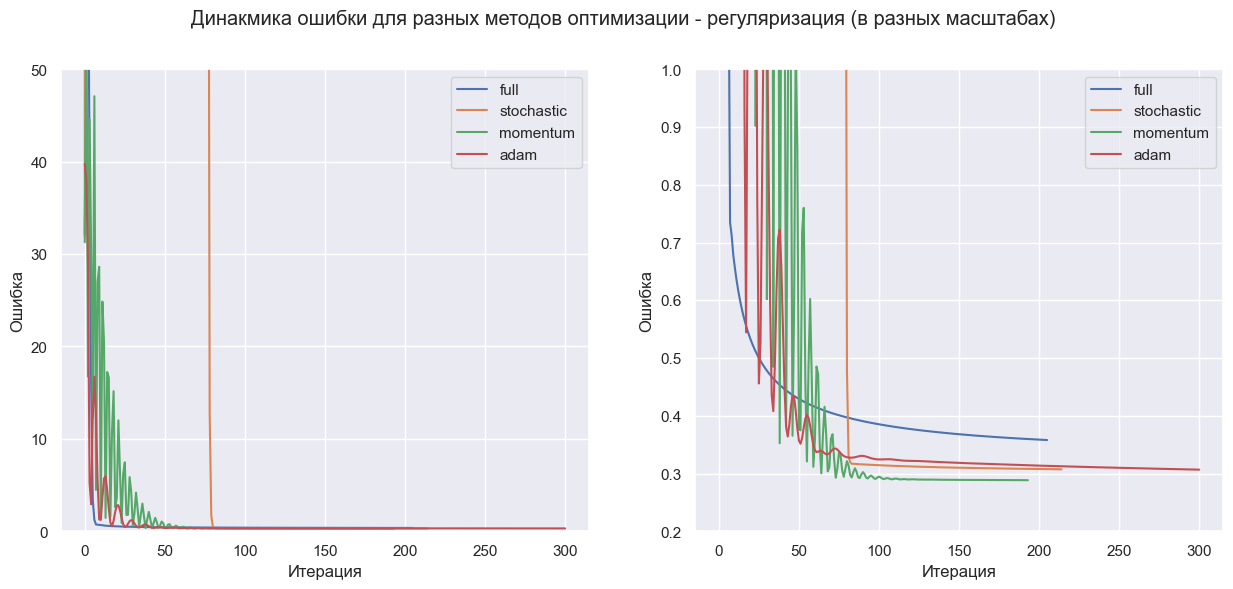

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for model, fit in best_reg_fits.items():
    sns.lineplot(best_reg_fits[model]["loss_history"], label=model, ax=axes[0])
    sns.lineplot(best_reg_fits[model]["loss_history"], label=model, ax=axes[1])
    print(f"{model}: loss = {fit["val_loss"]:.3f}, R^2 = {fit["r_squared"]:.3f}")

axes[0].set_ylim(0, 50)
axes[1].set_ylim(0.2, 1)

axes[0].set_xlabel("Итерация")
axes[0].set_ylabel("Ошибка")
axes[1].set_xlabel("Итерация")
axes[1].set_ylabel("Ошибка")

plt.suptitle("Динакмика ошибки для разных методов оптимизации - регуляризация (в разных масштабах)")

plt.show()

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

$$
\begin{gather}
\frac{\partial L}{\partial w} = \frac{\partial}{\partial w} \log(\cosh(Xw - y)) = \frac{1}{\log(\cosh(Xw-y))} \big( \sinh(Xw-y) \big)^\prime_w = \frac{\sinh(Xw-y)}{\cosh(Xw-y)}\big( Xw \big)^\prime_w = \\\\
= \frac{\sinh(Xw-y)}{\cosh(Xw-y)}X = \tanh(Xw - y)X
\end{gather}
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [67]:
import descents

In [68]:
descent_config = {
    "descent_name": None,
    "kwargs": {
        "dimension": x_train.shape[1],
        "lambda_": None,
        "loss_function": descents.LossFunction.MSE
    }
}

descent_methods = ["full", "stochastic", "momentum", "adam"]

lambda_values = np.logspace(0.5, -5, 10)

best_logcosh_fits = {}

y_train_np = y_train.to_numpy()

for method in descent_methods:
    fits = []
    for lambda_ in lambda_values:
        descent_config["descent_name"] = method
        descent_config["kwargs"]["lambda_"] = lambda_
        
        reg = LinearRegression(descent_config=descent_config)
        reg.fit(x_train, y_train_np)

        loss = reg.calc_loss(x_val, y_val)
        if loss != loss:
            continue
        
        fits.append({
            "lambda": lambda_,
            "val_loss": reg.calc_loss(x_val, y_val),
            "loss_history": reg.loss_history,
            "r_squared": r_squared(y_val, reg.predict(x_val))
        })
        
    best_fit = min(fits, key=lambda fit: fit["val_loss"])
    best_logcosh_fits[method] = best_fit

full: loss = 0.432, R^2 = 0.655
stochastic: loss = 0.679, R^2 = 0.458
momentum: loss = 0.290, R^2 = 0.768
adam: loss = 0.263, R^2 = 0.790


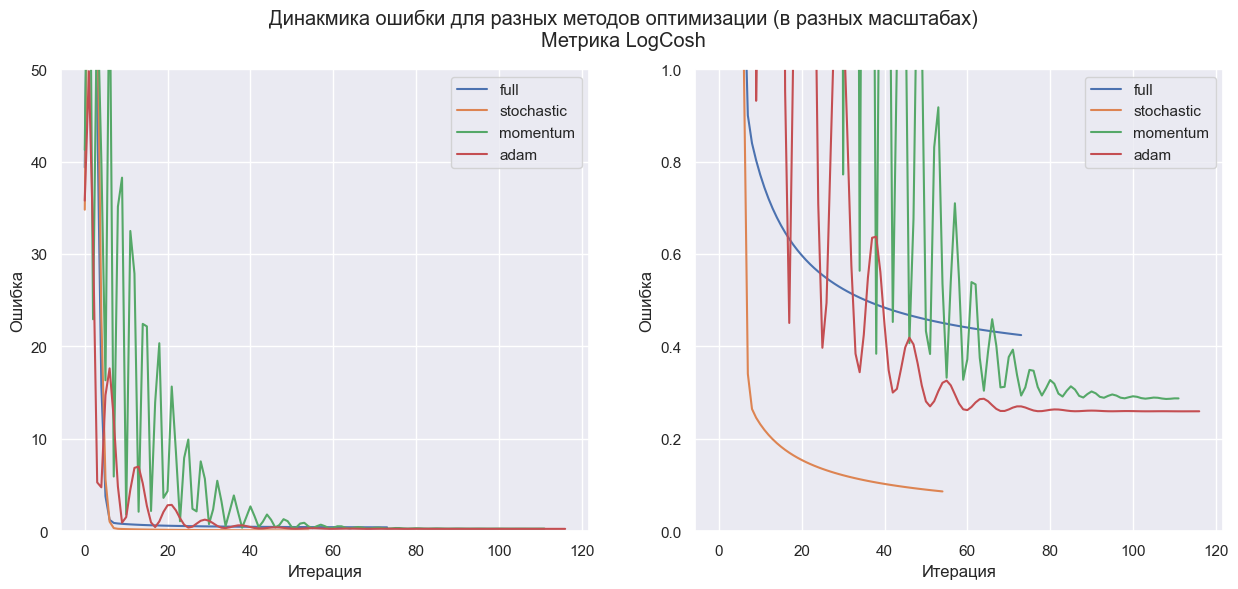

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for model, fit in best_logcosh_fits.items():
    sns.lineplot(best_logcosh_fits[model]["loss_history"], label=model, ax=axes[0])
    sns.lineplot(best_logcosh_fits[model]["loss_history"], label=model, ax=axes[1])
    print(f"{model}: loss = {fit["val_loss"]:.3f}, R^2 = {fit["r_squared"]:.3f}")

axes[0].set_ylim(0, 50)
axes[1].set_ylim(0, 1)

axes[0].set_xlabel("Итерация")
axes[0].set_ylabel("Ошибка")
axes[1].set_xlabel("Итерация")
axes[1].set_ylabel("Ошибка")

plt.suptitle("Динакмика ошибки для разных методов оптимизации (в разных масштабах)\nМетрика LogCosh")

plt.show()

LogCosh даёт $R^2$ немного больше. Поведение ошибки и соотношение $R^2$'ов не изменилось по сравнению со случаем MSE без регуляризации.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: